In [2]:
# Most Important
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sam = pd.read_csv('sample_submission2.csv')

In [6]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [7]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

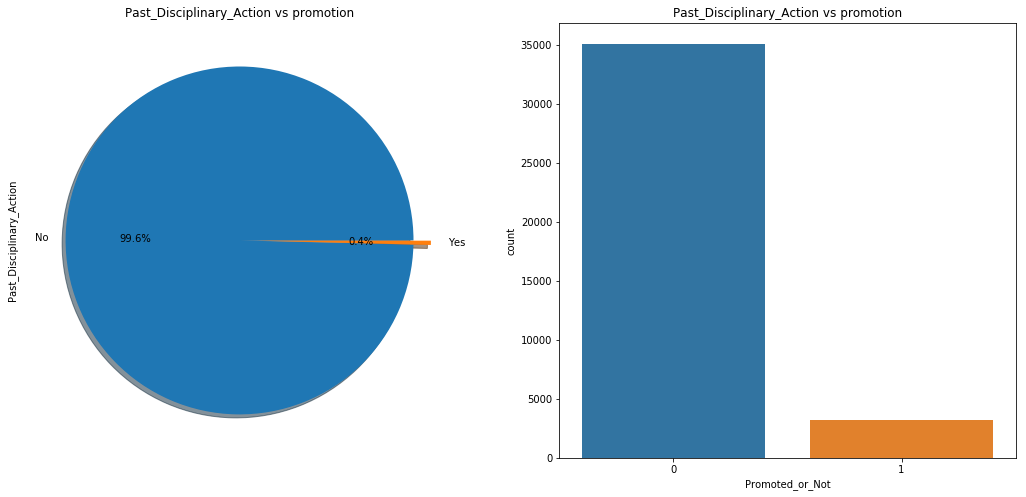

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Past_Disciplinary_Action'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Past_Disciplinary_Action vs promotion')
ax[0].set_ylabel('Past_Disciplinary_Action')
sns.countplot('Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Past_Disciplinary_Action vs promotion')
plt.show()

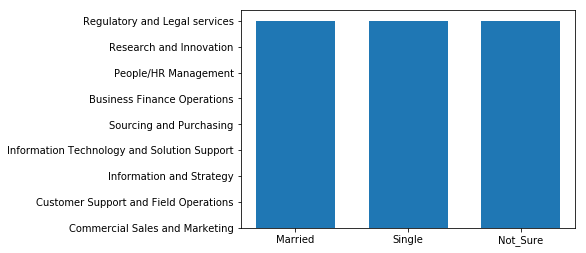

In [10]:
plt.bar(train['Marital_Status'],train['Division'], width = 0.7)
plt.show()

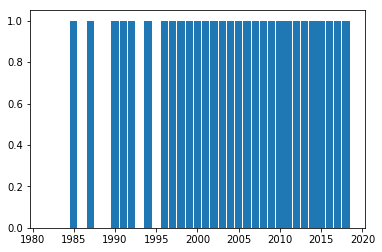

In [11]:
plt.bar(train['Year_of_recruitment'],train['Promoted_or_Not'], width = 0.9)
plt.show()

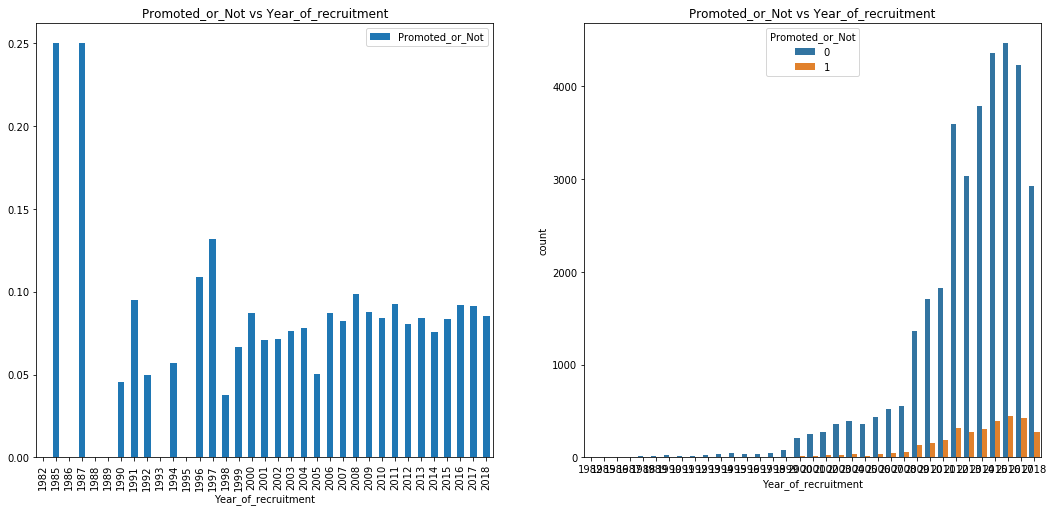

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train [['Year_of_recruitment','Promoted_or_Not']].groupby(['Year_of_recruitment']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Promoted_or_Not vs Year_of_recruitment')
sns.countplot('Year_of_recruitment',hue='Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Promoted_or_Not vs Year_of_recruitment')
plt.show()

In [13]:
train['Qualification'].value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

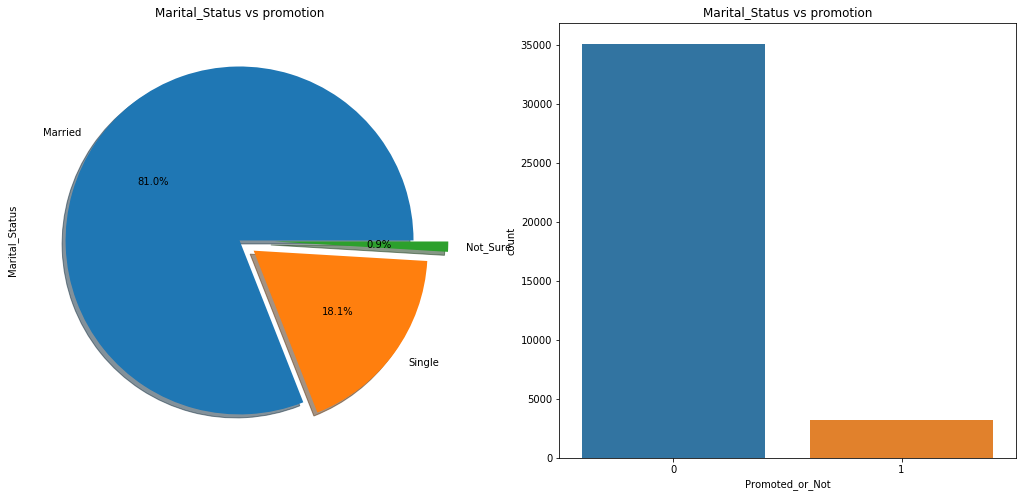

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Marital_Status'].value_counts().plot.pie(explode=[0,0.1,0.2],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Marital_Status vs promotion')
ax[0].set_ylabel('Marital_Status')
sns.countplot('Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Marital_Status vs promotion')
plt.show()

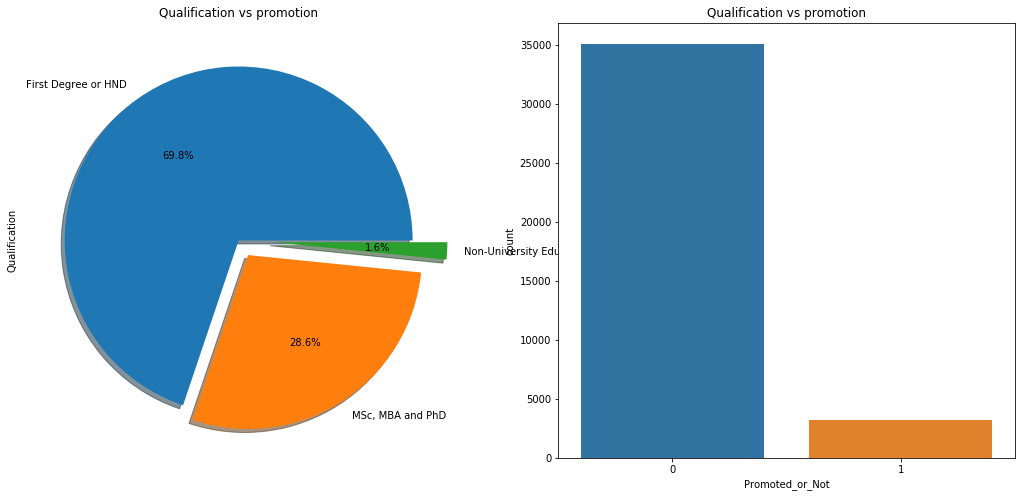

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Qualification'].value_counts().plot.pie(explode=[0,0.1,0.2],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Qualification vs promotion')
ax[0].set_ylabel('Qualification')
sns.countplot('Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Qualification vs promotion')
plt.show()

In [16]:
train.Division.value_counts()

Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64

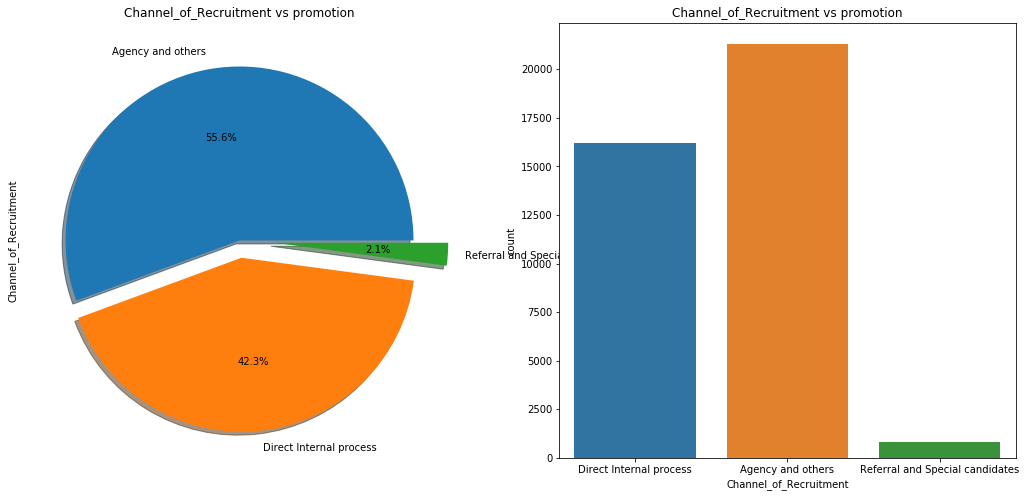

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Channel_of_Recruitment'].value_counts().plot.pie(explode=[0,0.1,0.2],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Channel_of_Recruitment vs promotion')
ax[0].set_ylabel('Channel_of_Recruitment')
sns.countplot('Channel_of_Recruitment',data=train,ax=ax[1])
ax[1].set_title('Channel_of_Recruitment vs promotion')
plt.show()

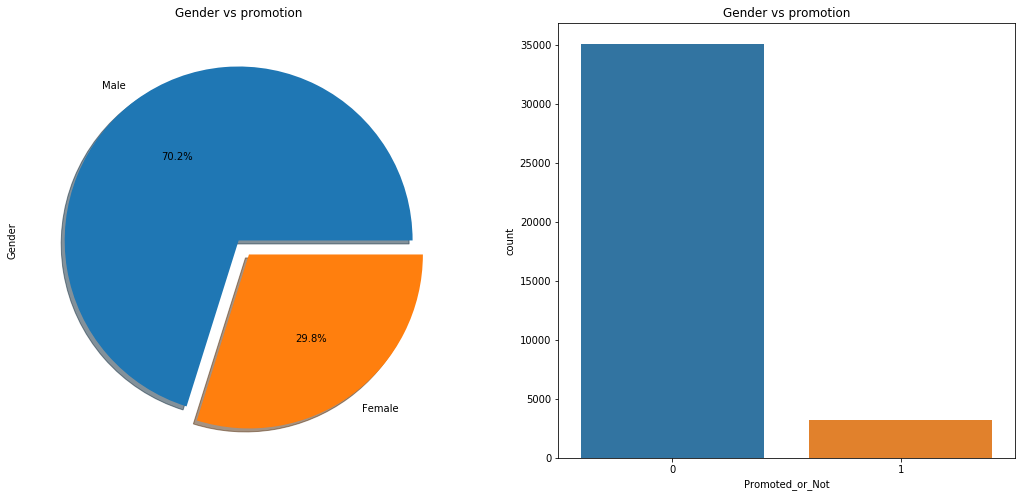

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Gender vs promotion')
ax[0].set_ylabel('Gender')
sns.countplot('Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Gender vs promotion')
plt.show()

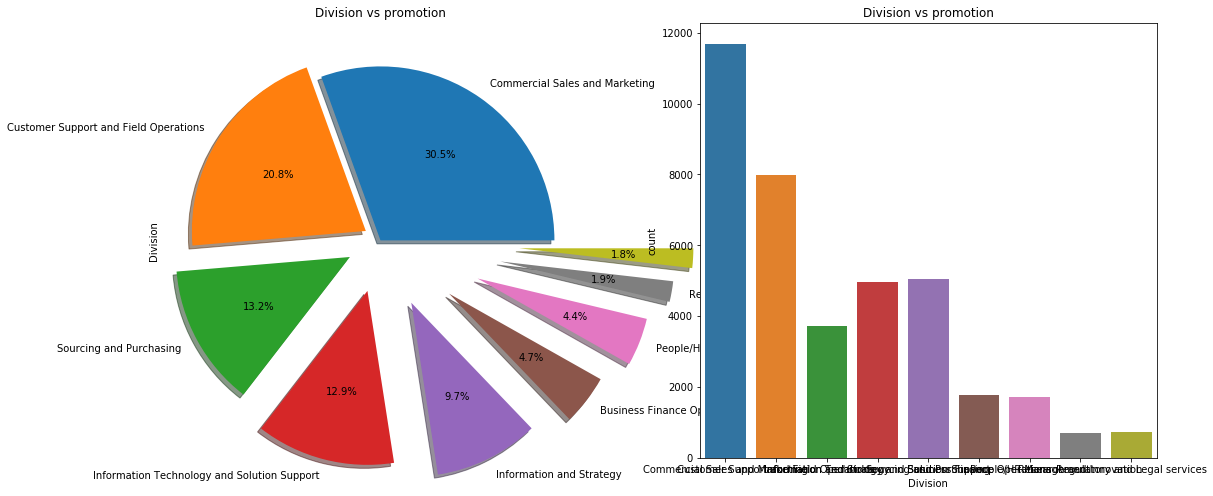

In [3]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Division'].value_counts().plot.pie(explode=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Division vs promotion')
ax[0].set_ylabel('Division')
sns.countplot('Division',data=train,ax=ax[1])
ax[1].set_title('Division vs promotion')
plt.show()

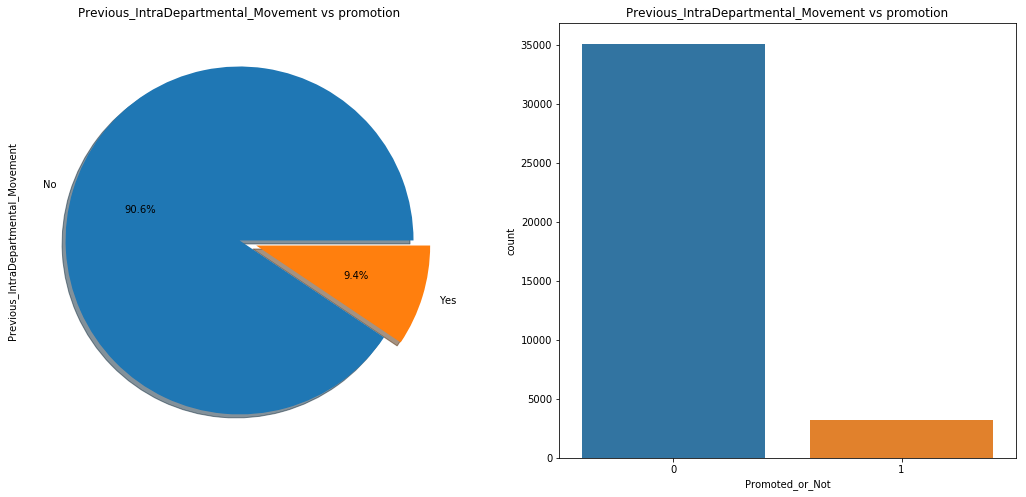

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Previous_IntraDepartmental_Movement'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0], shadow=True)
ax[0].set_title('Previous_IntraDepartmental_Movement vs promotion')
ax[0].set_ylabel('Previous_IntraDepartmental_Movement')
sns.countplot('Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Previous_IntraDepartmental_Movement vs promotion')
plt.show()

In [20]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [21]:
sns.barplot(train.Promoted_or_Not, train.No_of_previous_employers, orient = 'v')
plt.grid('on')
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
train.No_of_previous_employers.value_counts()

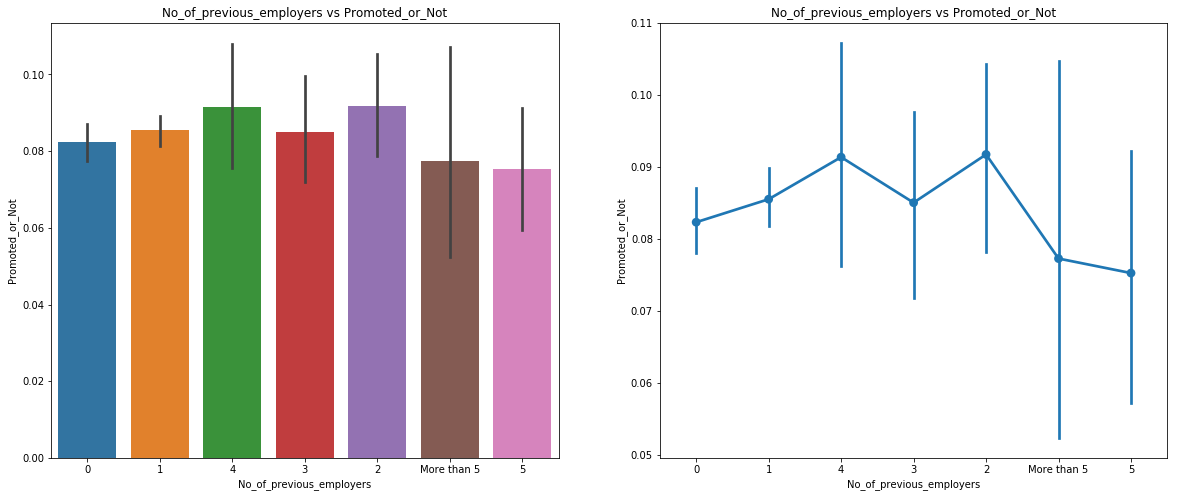

In [7]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('No_of_previous_employers','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('No_of_previous_employers vs Promoted_or_Not')
sns.factorplot('No_of_previous_employers','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('No_of_previous_employers vs Promoted_or_Not')
plt.close(2)
plt.show()

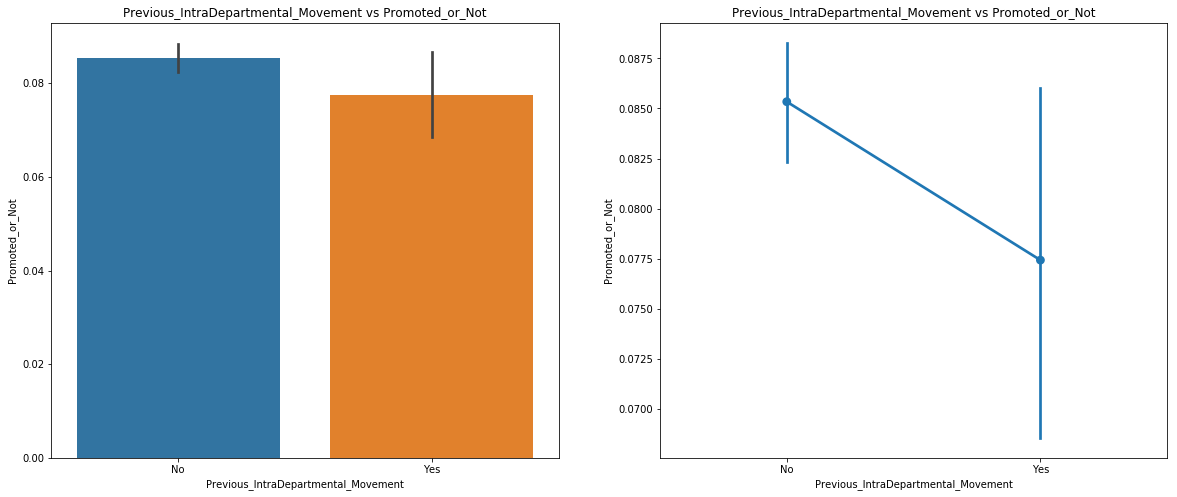

In [8]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Previous_IntraDepartmental_Movement','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Previous_IntraDepartmental_Movement vs Promoted_or_Not')
sns.factorplot('Previous_IntraDepartmental_Movement','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Previous_IntraDepartmental_Movement vs Promoted_or_Not')
plt.close(2)
plt.show()

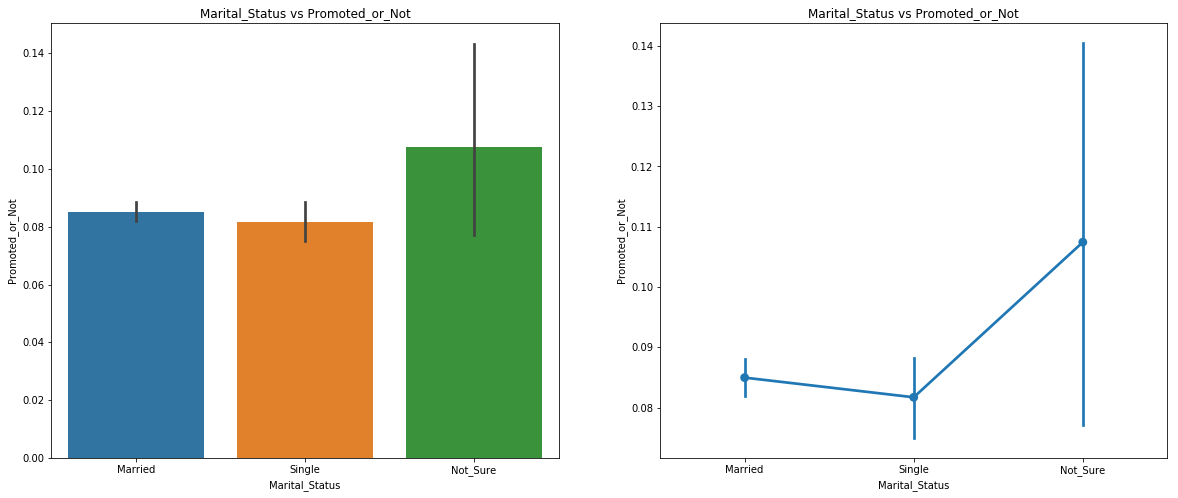

In [9]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Marital_Status','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Marital_Status vs Promoted_or_Not')
sns.factorplot('Marital_Status','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Marital_Status vs Promoted_or_Not')
plt.close(2)
plt.show()

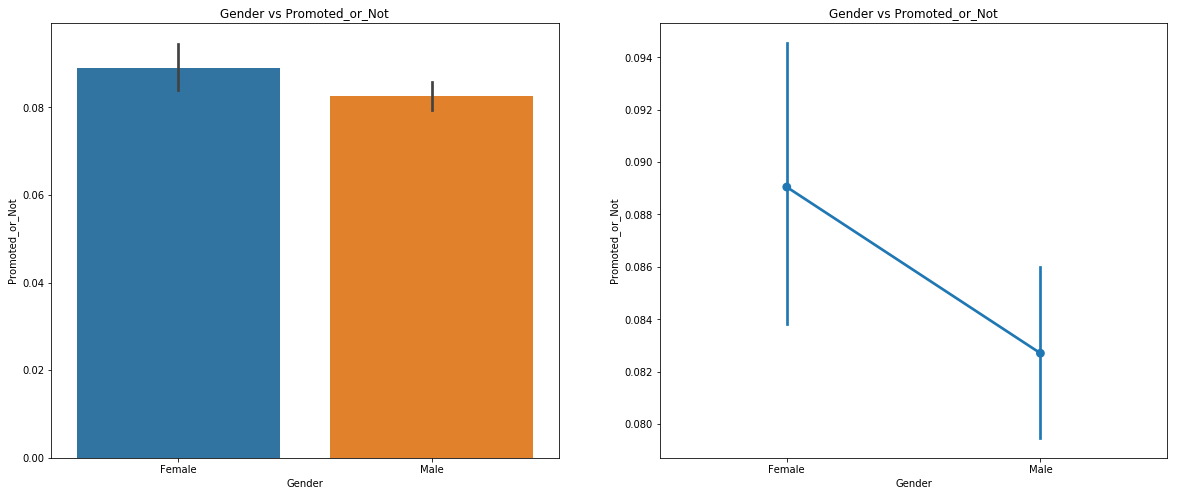

In [10]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Gender','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Gender vs Promoted_or_Not')
sns.factorplot('Gender','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Gender vs Promoted_or_Not')
plt.close(2)
plt.show()

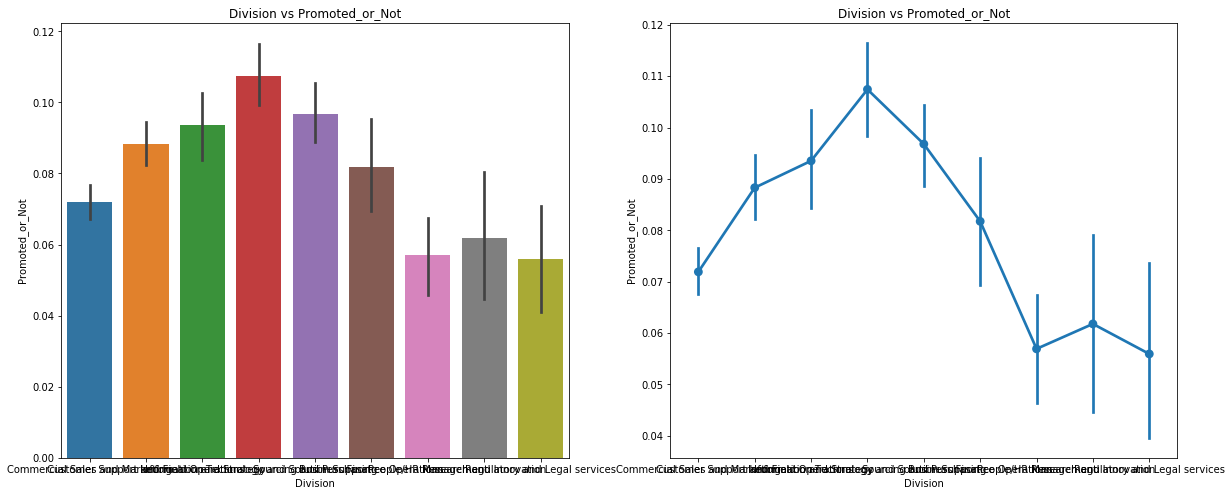

In [11]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Division','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Division vs Promoted_or_Not')
sns.factorplot('Division','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Division vs Promoted_or_Not')
plt.close(2)
plt.show()

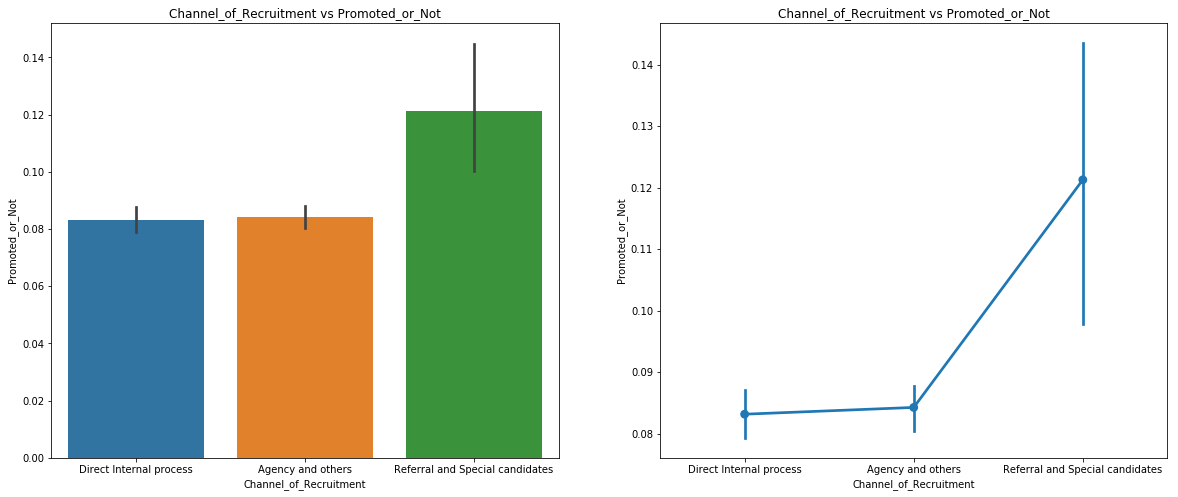

In [12]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Channel_of_Recruitment','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Channel_of_Recruitment vs Promoted_or_Not')
sns.factorplot('Channel_of_Recruitment','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Channel_of_Recruitment vs Promoted_or_Not')
plt.close(2)
plt.show()

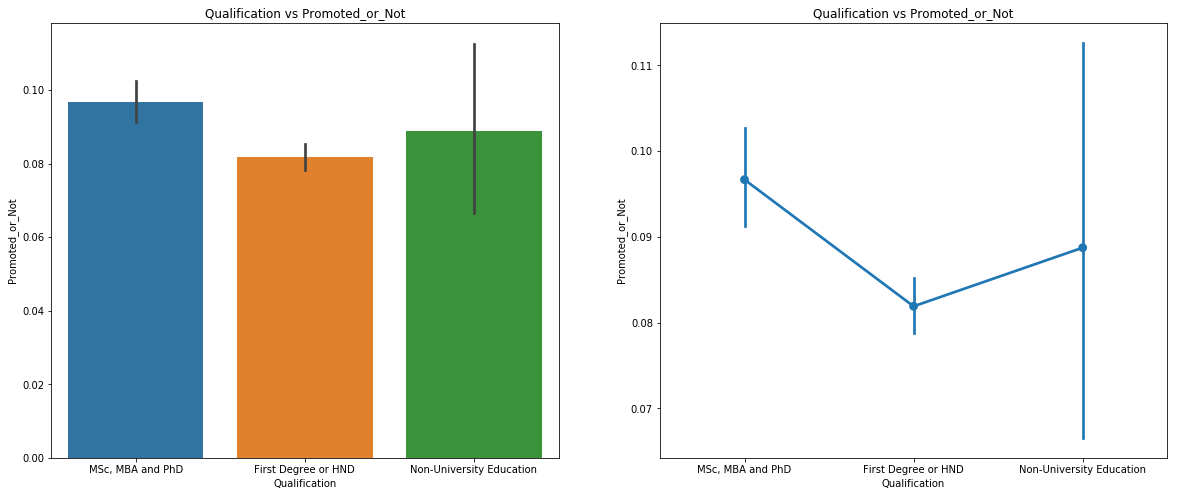

In [13]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Qualification','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Qualification vs Promoted_or_Not')
sns.factorplot('Qualification','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Qualification vs Promoted_or_Not')
plt.close(2)
plt.show()

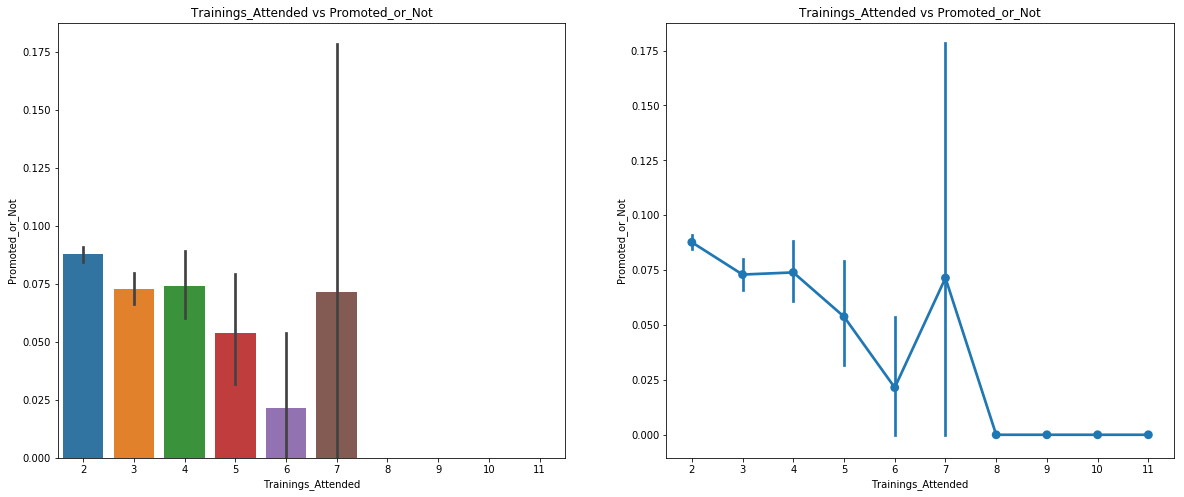

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Trainings_Attended','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Trainings_Attended vs Promoted_or_Not')
sns.factorplot('Trainings_Attended','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Trainings_Attended vs Promoted_or_Not')
plt.close(2)
plt.show()

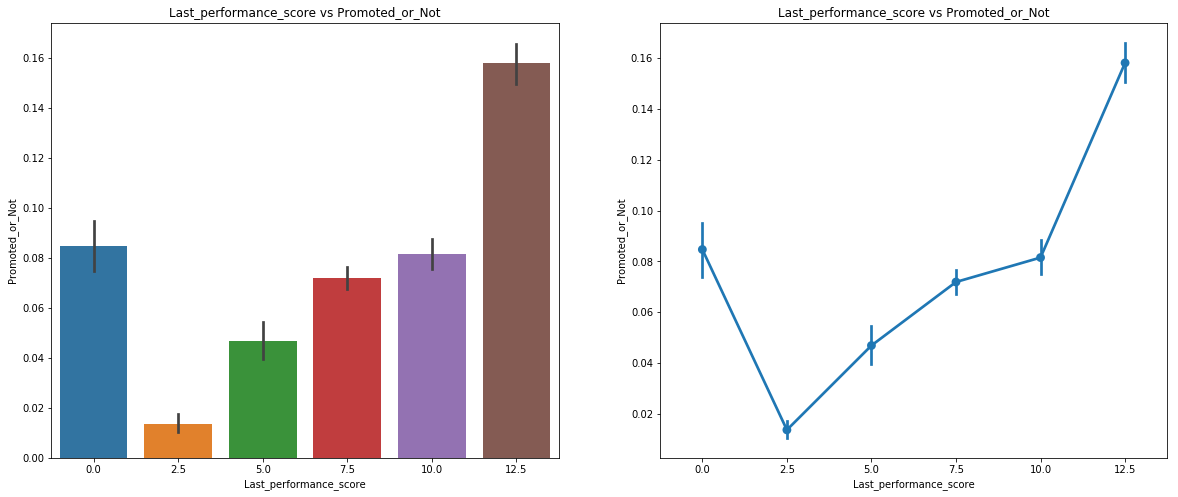

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Last_performance_score','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Last_performance_score vs Promoted_or_Not')
sns.factorplot('Last_performance_score','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Last_performance_score vs Promoted_or_Not')
plt.close(2)
plt.show()

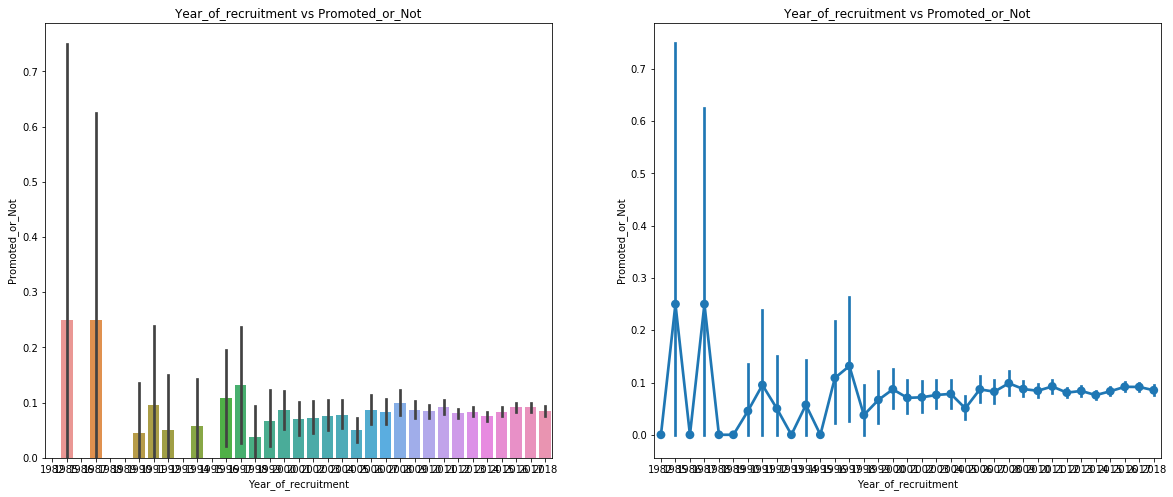

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Year_of_recruitment','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Year_of_recruitment vs Promoted_or_Not')
sns.factorplot('Year_of_recruitment','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Year_of_recruitment vs Promoted_or_Not')
plt.close(2)
plt.show()

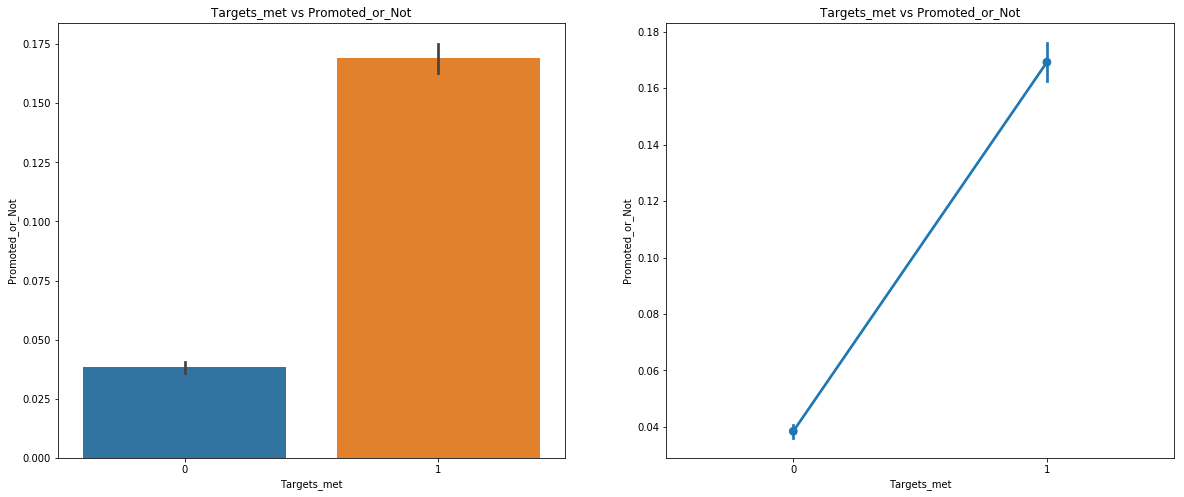

In [17]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Targets_met','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Targets_met vs Promoted_or_Not')
sns.factorplot('Targets_met','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Targets_met vs Promoted_or_Not')
plt.close(2)
plt.show()

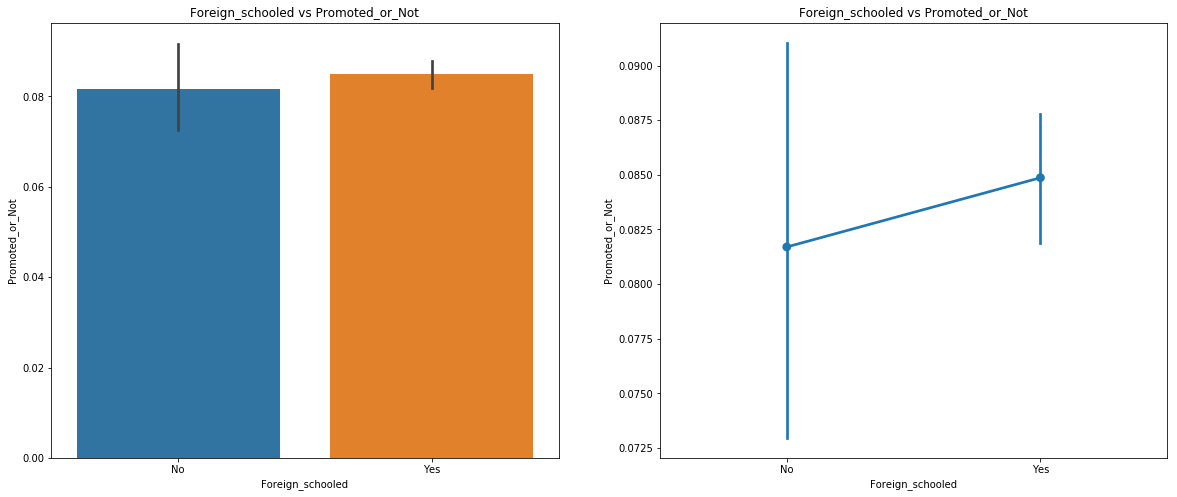

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Foreign_schooled','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Foreign_schooled vs Promoted_or_Not')
sns.factorplot('Foreign_schooled','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Foreign_schooled vs Promoted_or_Not')
plt.close(2)
plt.show()

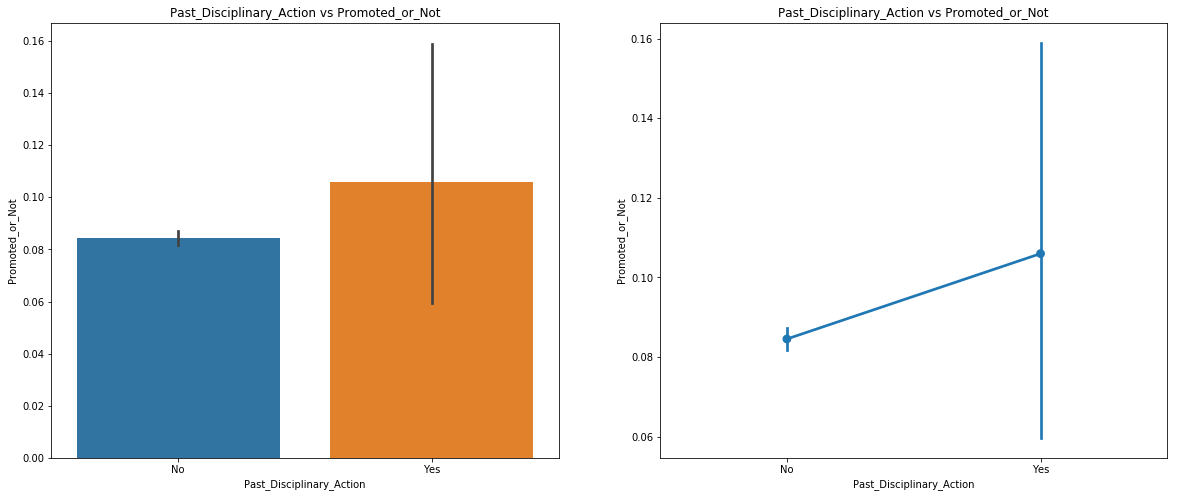

In [19]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Past_Disciplinary_Action','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Past_Disciplinary_Action vs Promoted_or_Not')
sns.factorplot('Past_Disciplinary_Action','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Past_Disciplinary_Action vs Promoted_or_Not')
plt.close(2)
plt.show()

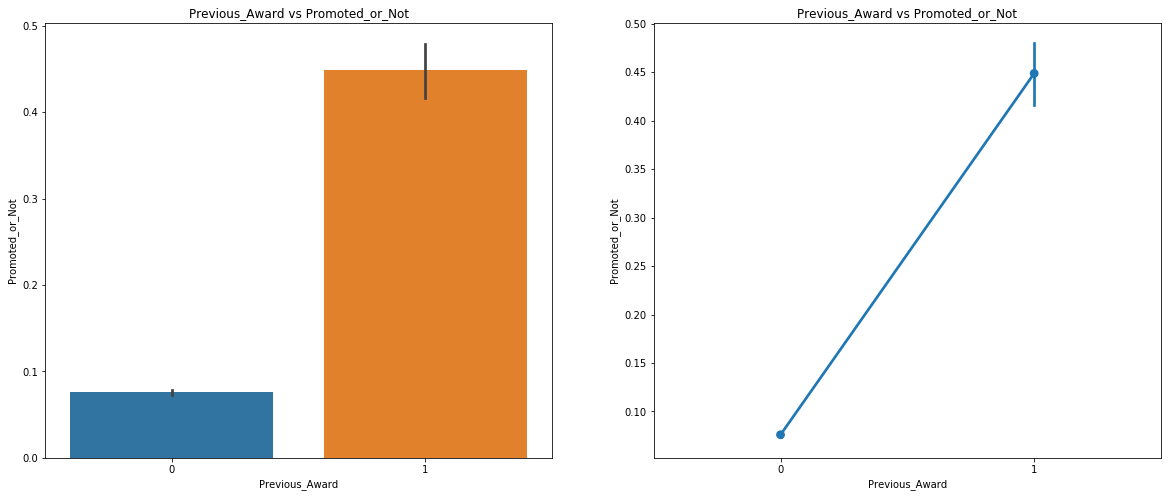

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Previous_Award','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Previous_Award vs Promoted_or_Not')
sns.factorplot('Previous_Award','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Previous_Award vs Promoted_or_Not')
plt.close(2)
plt.show()

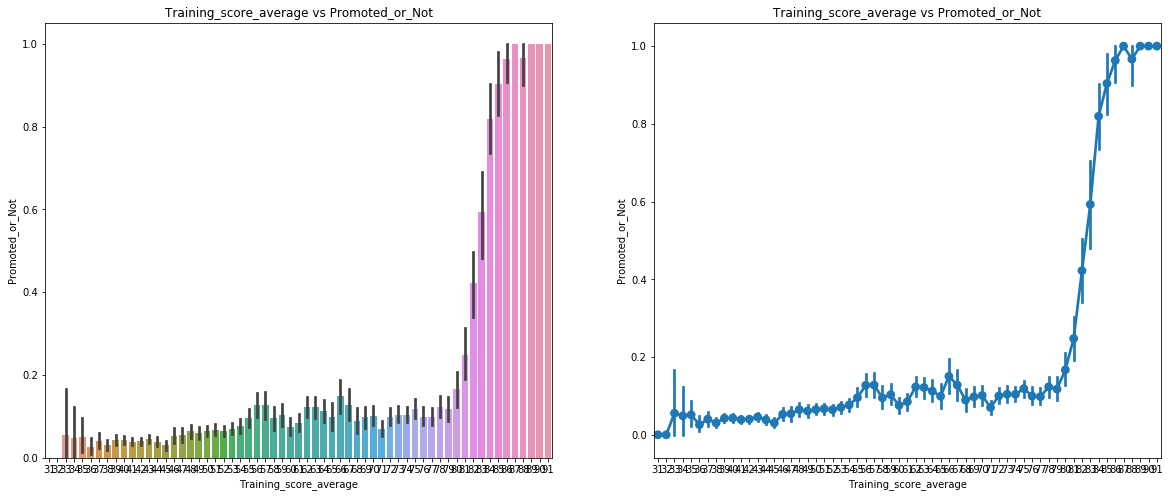

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Training_score_average','Promoted_or_Not',data=train,ax=ax[0])
ax[0].set_title('Training_score_average vs Promoted_or_Not')
sns.factorplot('Training_score_average','Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Training_score_average vs Promoted_or_Not')
plt.close(2)
plt.show()

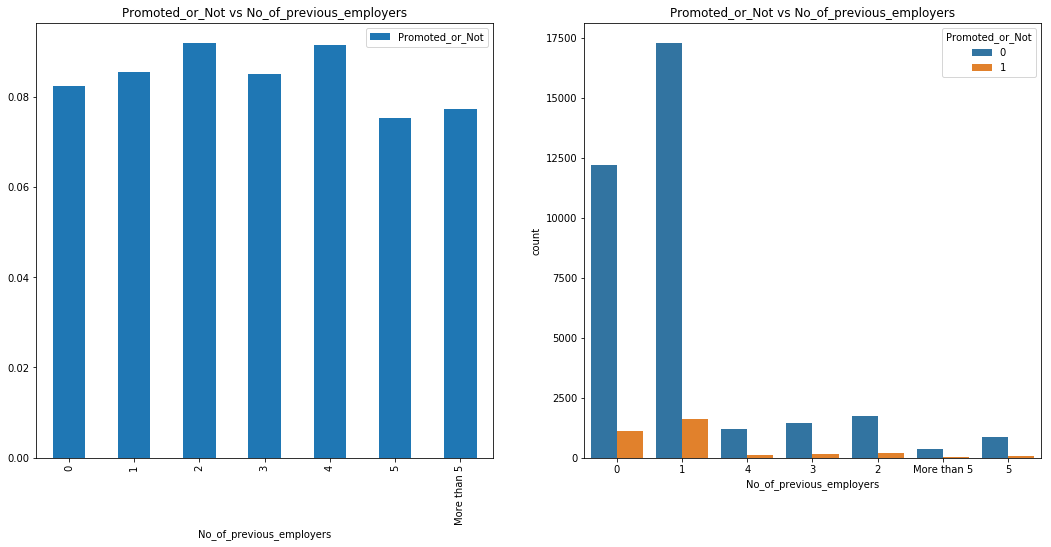

In [4]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train [['No_of_previous_employers','Promoted_or_Not']].groupby(['No_of_previous_employers']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Promoted_or_Not vs No_of_previous_employers')
sns.countplot('No_of_previous_employers',hue='Promoted_or_Not',data=train,ax=ax[1])
ax[1].set_title('Promoted_or_Not vs No_of_previous_employers')
plt.show()

In [ ]:
train.Year_of_birth.value_counts()

In [22]:
plt.bar(train['State_Of_Origin'],train['Promoted_or_Not'], width = 0.7)
plt.show()

KeyboardInterrupt: 

In [4]:
# Set As Individual Columns
itrain = pd.get_dummies(train, columns = ['Marital_Status', 'Gender', 'Division'])

In [5]:
# Set As Individual Columns
itest = pd.get_dummies(test, columns = ['Marital_Status', 'Gender', 'Division'])

In [5]:
# check if there is a year in train.Year_of_birth that is not in test.Year_of_birth
for i in train.Year_of_birth:
    if i in test.Year_of_birth:
        pass
    else:
        print(i)

In [6]:
# Drop irrelevant columns in itrain
itrain.drop(['Year_of_birth', 'Channel_of_Recruitment', 'Previous_IntraDepartmental_Movement', 'State_Of_Origin'], axis=1, inplace=True)

In [7]:
# Drop irrelevant columns in itest
itest.drop(['Year_of_birth', 'Channel_of_Recruitment', 'Previous_IntraDepartmental_Movement', 'State_Of_Origin'], axis=1, inplace=True)

In [28]:
itrain.shape, itest.shape

((38312, 26), (16496, 25))

In [29]:
train.Qualification.value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [8]:
# Set the rakings for Qualifications
itrain['Qualification'][itrain['Qualification'] == 'MSc, MBA and PhD'] = 0
itrain['Qualification'][itrain['Qualification'] == 'First Degree or HND'] = 1
itrain['Qualification'][itrain['Qualification'] == 'Non-University Education'] = 2

In [9]:
# Set the rakings for Qualifications
itest['Qualification'][itest['Qualification'] == 'MSc, MBA and PhD'] = 0
itest['Qualification'][itest['Qualification'] == 'First Degree or HND'] = 1
itest['Qualification'][itest['Qualification'] == 'Non-University Education'] = 2

In [32]:
itrain.Trainings_Attended.value_counts()

2     30981
3      5631
4      1244
5       316
6        93
7        28
8         6
10        5
11        4
9         4
Name: Trainings_Attended, dtype: int64

In [10]:
# Set the rakings for the number of traings attended
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 11] = 0
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 10] = 1
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 9] = 2
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 8] = 3
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 7] = 4
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 6] = 5
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 5] = 6
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 4] = 7
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 3] = 8
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 2] = 9

In [11]:
# Set the rakings for the number of traings attended
itest['Trainings_Attended'][itest['Trainings_Attended'] == 11] = 0
itest['Trainings_Attended'][itest['Trainings_Attended'] == 10] = 1
itest['Trainings_Attended'][itest['Trainings_Attended'] == 9] = 2
itest['Trainings_Attended'][itest['Trainings_Attended'] == 8] = 3
itest['Trainings_Attended'][itest['Trainings_Attended'] == 7] = 4
itest['Trainings_Attended'][itest['Trainings_Attended'] == 6] = 5
itest['Trainings_Attended'][itest['Trainings_Attended'] == 5] = 6
itest['Trainings_Attended'][itest['Trainings_Attended'] == 4] = 7
itest['Trainings_Attended'][itest['Trainings_Attended'] == 3] = 8
itest['Trainings_Attended'][itest['Trainings_Attended'] == 2] = 9

In [35]:
itrain.No_of_previous_employers.value_counts()

1              18867
0              13272
2               1918
3               1587
4               1324
5                943
More than 5      401
Name: No_of_previous_employers, dtype: int64

In [12]:
# Set the rakings for the number of previous work experience from employers
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 'More than 5'] = 0
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 5] = 1
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 4] = 2
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 3] = 3
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 2] = 4
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 1] = 5
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 0] = 6

In [13]:
# Set the rakings for the number of previous work experience from employers
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 'More than 5'] = 0
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 5] = 1
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 4] = 2
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 3] = 3
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 2] = 4
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 1] = 5
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 0] = 6

In [38]:
itrain.Last_performance_score.value_counts()

7.5     12993
12.5     8213
10.0     6932
2.5      4325
5.0      2944
0.0      2905
Name: Last_performance_score, dtype: int64

In [14]:
# Set the rakings for employee with the highest Last_performance_score
itrain['Last_performance_score'][itrain['Last_performance_score'] == 12.5] = 0
itrain['Last_performance_score'][itrain['Last_performance_score'] == 10.0] = 1
itrain['Last_performance_score'][itrain['Last_performance_score'] == 7.5] = 2
itrain['Last_performance_score'][itrain['Last_performance_score'] == 5.0] = 3
itrain['Last_performance_score'][itrain['Last_performance_score'] == 2.5] = 4
itrain['Last_performance_score'][itrain['Last_performance_score'] == 0.0] = 5


In [15]:
# Set the rakings for employee with the highest Last_performance_score
itest['Last_performance_score'][itest['Last_performance_score'] == 12.5] = 0
itest['Last_performance_score'][itest['Last_performance_score'] == 10.0] = 1
itest['Last_performance_score'][itest['Last_performance_score'] == 7.5] = 2
itest['Last_performance_score'][itest['Last_performance_score'] == 5.0] = 3
itest['Last_performance_score'][itest['Last_performance_score'] == 2.5] = 4
itest['Last_performance_score'][itest['Last_performance_score'] == 0.0] = 5


In [41]:
itrain.Year_of_recruitment.value_counts()

2016    4916
2015    4757
2017    4656
2014    4101
2012    3909
2013    3314
2018    3194
2011    2011
2010    1865
2009    1497
2008     619
2007     570
2006     472
2004     422
2003     394
2005     376
2002     293
2001     269
2000     230
1999      90
1998      53
1995      51
1996      46
1997      38
1994      35
1993      27
1990      22
1991      21
1992      20
1988      13
1989      11
1987       8
1986       7
1985       4
1982       1
Name: Year_of_recruitment, dtype: int64

In [16]:
# Set the rakings for employees with longer working experience with th organization
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1982] = 0
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1985] = 1
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1986] = 2
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1987] = 3
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1988] = 4
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1989] = 5
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1990] = 6
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1991] = 7
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1992] = 8
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1993] = 9
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1994] = 10
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1995] = 11
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1996] = 12
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1997] = 13
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1998] = 14
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1999] = 15
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2000] = 16
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2001] = 17
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2002] = 18
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2003] = 19
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2004] = 20
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2005] = 21
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2006] = 22
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2007] = 23
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2008] = 24
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2009] = 25
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2010] = 26
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2011] = 27
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2012] = 28
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2013] = 29
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2014] = 30
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2015] = 31
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2016] = 32
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2017] = 33
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2018] = 34

In [17]:
# Set the rakings for employees with longer working experience with th organization
itest.Year_of_recruitment[itest.Year_of_recruitment == 1982] = 0
itest.Year_of_recruitment[itest.Year_of_recruitment == 1985] = 1
itest.Year_of_recruitment[itest.Year_of_recruitment == 1986] = 2
itest.Year_of_recruitment[itest.Year_of_recruitment == 1987] = 3
itest.Year_of_recruitment[itest.Year_of_recruitment == 1988] = 4
itest.Year_of_recruitment[itest.Year_of_recruitment == 1989] = 5
itest.Year_of_recruitment[itest.Year_of_recruitment == 1990] = 6
itest.Year_of_recruitment[itest.Year_of_recruitment == 1991] = 7
itest.Year_of_recruitment[itest.Year_of_recruitment == 1992] = 8
itest.Year_of_recruitment[itest.Year_of_recruitment == 1993] = 9
itest.Year_of_recruitment[itest.Year_of_recruitment == 1994] = 10
itest.Year_of_recruitment[itest.Year_of_recruitment == 1995] = 11
itest.Year_of_recruitment[itest.Year_of_recruitment == 1996] = 12
itest.Year_of_recruitment[itest.Year_of_recruitment == 1997] = 13
itest.Year_of_recruitment[itest.Year_of_recruitment == 1998] = 14
itest.Year_of_recruitment[itest.Year_of_recruitment == 1999] = 15
itest.Year_of_recruitment[itest.Year_of_recruitment == 2000] = 16
itest.Year_of_recruitment[itest.Year_of_recruitment == 2001] = 17
itest.Year_of_recruitment[itest.Year_of_recruitment == 2002] = 18
itest.Year_of_recruitment[itest.Year_of_recruitment == 2003] = 19
itest.Year_of_recruitment[itest.Year_of_recruitment == 2004] = 20
itest.Year_of_recruitment[itest.Year_of_recruitment == 2005] = 21
itest.Year_of_recruitment[itest.Year_of_recruitment == 2006] = 22
itest.Year_of_recruitment[itest.Year_of_recruitment == 2007] = 23
itest.Year_of_recruitment[itest.Year_of_recruitment == 2008] = 24
itest.Year_of_recruitment[itest.Year_of_recruitment == 2009] = 25
itest.Year_of_recruitment[itest.Year_of_recruitment == 2010] = 26
itest.Year_of_recruitment[itest.Year_of_recruitment == 2011] = 27
itest.Year_of_recruitment[itest.Year_of_recruitment == 2012] = 28
itest.Year_of_recruitment[itest.Year_of_recruitment == 2013] = 29
itest.Year_of_recruitment[itest.Year_of_recruitment == 2014] = 30
itest.Year_of_recruitment[itest.Year_of_recruitment == 2015] = 31
itest.Year_of_recruitment[itest.Year_of_recruitment == 2016] = 32
itest.Year_of_recruitment[itest.Year_of_recruitment == 2017] = 33
itest.Year_of_recruitment[itest.Year_of_recruitment == 2018] = 34

In [ ]:
itrain.Targets_met.value_counts()

In [18]:
# Set the rakings for employees who has met the target for a particular project
itrain['Targets_met'][itrain['Targets_met'] == 1] = 0
itrain['Targets_met'][itrain['Targets_met'] == 0] = 1

In [19]:
# Set the rakings for employees who has met the target for a particular project
itest['Targets_met'][itest['Targets_met'] == 1] = 0
itest['Targets_met'][itest['Targets_met'] == 0] = 1

In [ ]:
itrain.Foreign_schooled.value_counts()

In [20]:
# Set the rakings for employees who schooled abroad and those who didnt
itrain.Foreign_schooled[itrain.Foreign_schooled == 'Yes'] = 0
itrain.Foreign_schooled[itrain.Foreign_schooled == 'No'] = 1

In [21]:
# Set the rakings for employees who schooled abroad and those who didnt
itest.Foreign_schooled[itest.Foreign_schooled == 'Yes'] = 0
itest.Foreign_schooled[itest.Foreign_schooled == 'No'] = 1

In [ ]:
itrain.Past_Disciplinary_Action.value_counts()

In [22]:
# Set the rakings for employees who were previously disciplined and those who were not
itrain.Past_Disciplinary_Action[itrain.Past_Disciplinary_Action == 'No'] = 0
itrain.Past_Disciplinary_Action[itrain.Past_Disciplinary_Action == 'Yes'] = 1

In [23]:
# Set the rakings for employees who were previously disciplined and those who were not
itest.Past_Disciplinary_Action[itest.Past_Disciplinary_Action == 'No'] = 0
itest.Past_Disciplinary_Action[itest.Past_Disciplinary_Action == 'Yes'] = 1

In [24]:
# convert the datatype to numeric
itrain.Qualification = pd.to_numeric(itrain.Qualification)
itrain.Foreign_schooled = pd.to_numeric(itrain.Foreign_schooled)
itrain.Past_Disciplinary_Action = pd.to_numeric(itrain.Past_Disciplinary_Action)
itrain.No_of_previous_employers = pd.to_numeric(itrain.No_of_previous_employers)

In [25]:
# convert the datatype to numeric
itest.Qualification = pd.to_numeric(itest.Qualification)
itest.Foreign_schooled = pd.to_numeric(itest.Foreign_schooled)
itest.Past_Disciplinary_Action = pd.to_numeric(itest.Past_Disciplinary_Action)
itest.No_of_previous_employers = pd.to_numeric(itest.No_of_previous_employers)

In [ ]:
itrain.info()

In [26]:
# set the Submission Id as target_Id, drop it from the given data
target_Id = itrain.EmployeeNo
itrain.drop(['EmployeeNo'], axis=1, inplace=True)
itest.drop(['EmployeeNo'], axis=1, inplace=True)

In [27]:
# Fillna values with the mode
for i in itrain.columns:
    itrain[i].fillna(itrain[i].mode()[0], inplace = True)

In [28]:
# Fillna values with the mode
for i in itest.columns:
    itest[i].fillna(itest[i].mode()[0], inplace = True)

# Data Balancing And Spliting

In [29]:
# Balance the given data
def using_smote(X, y):
    from imblearn.over_sampling import SMOTE
    sm = SMOTE(ratio = 1.0)
    X, y = sm.fit_sample(X, y)
    return X, y

In [30]:
# set the target data and drop it
target = itrain.Promoted_or_Not
itrain.drop(['Promoted_or_Not'], axis=1, inplace=True)

In [31]:
# set the values to be balanced
x_train, y_train = using_smote(itrain, target)

In [32]:
# split the data into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x_train, y_train, test_size = 0.22, random_state = 42)

In [33]:
x_train.shape, x_test.shape

((54710, 24), (15432, 24))

In [34]:
# import the machine models to be used
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import GradientBoostingClassifier

# import the tools for metrics
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [46]:
# using Random Forest Classifier
model = RandomForestClassifier(n_estimators=270, random_state=3, max_features='auto', n_jobs=3, bootstrap=True, class_weight=None, criterion='gini')
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9898373240723817, 0.9590461378952825)

In [52]:
# predict using the X_test
pred = model.predict(x_test)

In [48]:
# Get the f1 score
f1_score(pred2, y_test)

0.9584756898817345

In [53]:
# predict for the itest data 
pred1 = model.predict(itest)

In [50]:
# see the overall performance of the data
from sklearn.metrics import classification_report
print('çlassification_report')
print(classification_report(pred2, y_test))

çlassification_report
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      7964
           1       0.94      0.98      0.96      7468

   micro avg       0.96      0.96      0.96     15432
   macro avg       0.96      0.96      0.96     15432
weighted avg       0.96      0.96      0.96     15432



In [56]:
test.shape, itrain.shape

((16496, 18), (38312, 24))

In [58]:
target_Id = test.EmployeeNo
output = pd.DataFrame(data = {'EmployeeNo':target_Id, 'Promoted_or_Not':pred1})
output.to_csv(path_or_buf = 'gb-nbumiepredi.csv', index = False, quoting = 3)

In [59]:
# using the GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 270, max_depth=3, min_samples_split=1200, min_samples_leaf=80, subsample=0.8, random_state=42, max_features='auto')
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9589471760190094, 0.958203732503888)

In [61]:
# predict using the x_test
pred2 = model.predict(x_test)

In [62]:
# predict using the itest data
pred = model.predict(itest)

In [63]:
# get the f1 score
f1_score(pred2, y_test)

0.9567491450412392

In [64]:
# see the overall performance of the data
from sklearn.metrics import classification_report
print('çlassification_report')
print(classification_report(pred2, y_test))

çlassification_report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      8271
           1       0.92      1.00      0.96      7161

   micro avg       0.96      0.96      0.96     15432
   macro avg       0.96      0.96      0.96     15432
weighted avg       0.96      0.96      0.96     15432



In [50]:
from xgboost import XGBClassifier

In [51]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.2, num_boosting_rounds = 270 , max_depth=10, subsample=0.8)
xgb.fit(x_train, y_train)
xgb.score(x_train, y_train), model.score(x_test, y_test)

(0.9716322427344178, 0.9604717470191809)

In [52]:
pred2 = xgb.predict(x_test)

In [53]:
# get the f1 score
f1_score(pred2, y_test)

0.9663815396856973

In [54]:
# see the overall performance of the data
from sklearn.metrics import classification_report
print('çlassification_report')
print(classification_report(pred2, y_test))

çlassification_report
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      8103
           1       0.94      0.99      0.97      7329

   micro avg       0.97      0.97      0.97     15432
   macro avg       0.97      0.97      0.97     15432
weighted avg       0.97      0.97      0.97     15432



In [70]:
# predict using the itest data
pred = xgb.predict(itest)

NameError: name 'xgb' is not defined

In [ ]:
target_Id = test.EmployeeNo

In [ ]:
pred.shape

In [ ]:
output = pd.DataFrame(data = {'EmployeeNo':target_Id, 'Promoted_or_Not':pred})
output.to_csv(path_or_buf = 'xgbbumiepredi.csv', index = False, quoting = 3)

In [65]:
from vecstack import stacking
from xgboost import XGBClassifier
models = [RandomForestClassifier(n_estimators=270, random_state=24, max_features='auto', n_jobs=3, bootstrap=True, class_weight=None, criterion='gini'), GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 270, random_state=24, max_features='log2', max_depth=5), XGBClassifier(learning_rate = 0.2, random_state=24, num_boosting_rounds = 270 , max_depth=10, subsample=0.8)]
S_train, S_test = stacking(models,                   
                           x_train, y_train, x_test,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=f1_score, 
    
                           n_folds=5, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [f1_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [RandomForestClassifier]
    fold  0:  [0.95596313]
    fold  1:  [0.94865800]
    fold  2:  [0.95154350]
    fold  3:  [0.95515988]
    fold  4:  [0.95037058]
    ----
    MEAN:     [0.95233902] + [0.00279818]
    FULL:     [0.95234536]

model  1:     [GradientBoostingClassifier]
    fold  0:  [0.95804860]
    fold  1:  [0.95329592]
    fold  2:  [0.95351269]
    fold  3:  [0.95687690]
    fold  4:  [0.95192675]
    ----
    MEAN:     [0.95473217] + [0.00232460]
    FULL:     [0.95473564]

model  2:     [XGBClassifier]
    fold  0:  [0.96527059]
    fold  1:  [0.96143329]
    fold  2:  [0.96152395]
    fold  3:  [0.96314450]
    fold  4:  [0.95980327]
    ----
    MEAN:     [0.96223512] + [0.00184952]
    FULL:     [0.96223781]



In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(S_train, y_train)
lr.score(S_train, y_train), lr.score(S_test, y_test)

(0.9634801681593859, 0.9667573872472783)

In [68]:
pred1 = lr.predict(S_test)
pred = lr.predict(itest)
f1_score(pred1, y_test)

ValueError: X has 24 features per sample; expecting 3

In [69]:
# see the overall performance of the data
from sklearn.metrics import classification_report
print('çlassification_report')
print(classification_report(pred1, y_test))

çlassification_report
              precision    recall  f1-score   support

           0       0.99      0.94      0.97      8109
           1       0.94      0.99      0.97      7323

   micro avg       0.97      0.97      0.97     15432
   macro avg       0.97      0.97      0.97     15432
weighted avg       0.97      0.97      0.97     15432

